In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.1.0'

In [3]:
keras.__version__

'2.2.4-tf'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
import numpy as np
import matplotlib.pyplot as plt

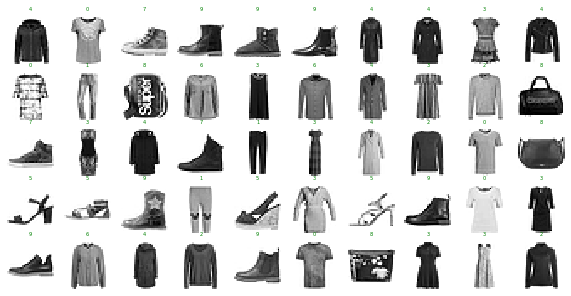

In [10]:
plt.figure(figsize = (10, 5))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.title(y_train[i], fontsize = 5, color = 'green')
    plt.imshow(X_train[i], cmap = 'gray_r', interpolation = 'nearest')
    plt.axis(False)
plt.show()

In [11]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
tmp_model = keras.models.Sequential()

tmp_model.add(keras.layers.InputLayer(input_shape = [28, 28]))
tmp_model.add(keras.layers.Dense(300, activation = 'relu'))
tmp_model.add(keras.layers.Dense(100, activation = 'relu'))
tmp_model.add(keras.layers.Dense(10, activation = 'softmax'))

In [14]:
print(tmp_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 28, 300)           8700      
_________________________________________________________________
dense_4 (Dense)              (None, 28, 100)           30100     
_________________________________________________________________
dense_5 (Dense)              (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
model.layers

In [16]:
model.layers[1].name

'dense'

In [17]:
model.get_layer('dense_2').name

'dense_2'

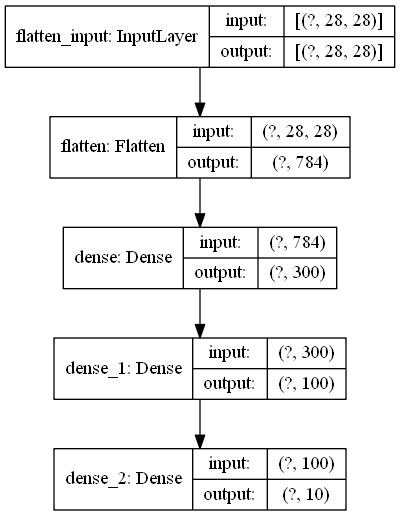

In [18]:
keras.utils.plot_model(model, 'my_mnist_model.png', show_shapes = True)

In [19]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [20]:
model.get_layer(hidden1.name) is hidden1

True

In [21]:
weights, biases = hidden1.get_weights()

In [22]:
weights

array([[ 0.001734  , -0.04434318, -0.00726076, ..., -0.03302916,
         0.00289691, -0.04477935],
       [ 0.00287704,  0.00388503,  0.03278573, ..., -0.00107036,
        -0.06304276, -0.04974168],
       [ 0.05112076, -0.0440077 ,  0.06304495, ..., -0.05917774,
        -0.03520082, -0.02109675],
       ...,
       [ 0.01699205, -0.02283495,  0.02002157, ..., -0.0677051 ,
        -0.00985338, -0.00580958],
       [-0.03297632, -0.02577369,  0.06402218, ..., -0.00462953,
        -0.02636464, -0.050822  ],
       [-0.04627115,  0.05184679, -0.03312892, ...,  0.03032371,
         0.04560619, -0.02391022]], dtype=float32)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
weights.shape

(784, 300)

In [25]:
biases.shape

(300,)

In [26]:
weights[0].shape

(300,)

In [27]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

In [28]:
# or we can use

# model.compile(loss = keras.losses.sparse_categorical_crossentropy,
#              optimizer = keras.optimizers.SGD(),
#              metrics = [keras.metrics.sparse_categorical_accuracy])

In [29]:
history = model.fit(X_train, y_train, epochs = 30,
                   validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 8s 142us/sample - loss: 0.7129 - accuracy: 0.7662 - val_loss: 0.5107 - val_accuracy: 0.8282
Epoch 2/30
55000/55000 [==============================] - 7s 127us/sample - loss: 0.4883 - accuracy: 0.8300 - val_loss: 0.4339 - val_accuracy: 0.8578
Epoch 3/30
55000/55000 [==============================] - 7s 129us/sample - loss: 0.4439 - accuracy: 0.8450 - val_loss: 0.4159 - val_accuracy: 0.8622
Epoch 4/30
55000/55000 [==============================] - 7s 127us/sample - loss: 0.4177 - accuracy: 0.8524 - val_loss: 0.3985 - val_accuracy: 0.8674
Epoch 5/30
55000/55000 [==============================] - 7s 126us/sample - loss: 0.3957 - accuracy: 0.8608 - val_loss: 0.3768 - val_accuracy: 0.8702
Epoch 6/30
55000/55000 [==============================] - 7s 125us/sample - loss: 0.3807 - accuracy: 0.8652 - val_loss: 0.3985 - val_accuracy: 0.8588
Epoch 7/30
55000/55000 [===========================

In [31]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [32]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [33]:
import pandas as pd

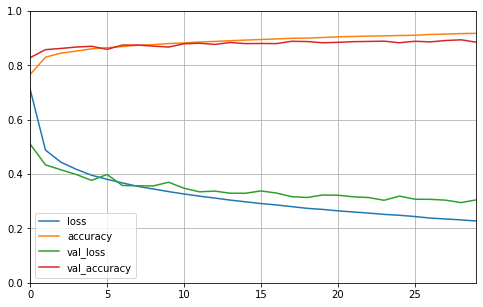

In [34]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid()
plt.gca().set_ylim(0, 1)
plt.show()

In [35]:
model.fit(X_train, y_train, epochs = 10,
         validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 69us/sample - loss: 0.2241 - accuracy: 0.9195 - val_loss: 0.3169 - val_accuracy: 0.8894
Epoch 2/10
55000/55000 [==============================] - 4s 71us/sample - loss: 0.2210 - accuracy: 0.9207 - val_loss: 0.3102 - val_accuracy: 0.8820
Epoch 3/10
55000/55000 [==============================] - 4s 70us/sample - loss: 0.2169 - accuracy: 0.9208 - val_loss: 0.2969 - val_accuracy: 0.8960
Epoch 4/10
55000/55000 [==============================] - 4s 70us/sample - loss: 0.2136 - accuracy: 0.9237 - val_loss: 0.2938 - val_accuracy: 0.8968
Epoch 5/10
55000/55000 [==============================] - 4s 70us/sample - loss: 0.2100 - accuracy: 0.9255 - val_loss: 0.2953 - val_accuracy: 0.8942
Epoch 6/10
55000/55000 [==============================] - 4s 73us/sample - loss: 0.2066 - accuracy: 0.9256 - val_loss: 0.3170 - val_accuracy: 0.8886
Epoch 7/10
55000/55000 [==============================] -

In [36]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 44us/sample - loss: 60.5109 - accuracy: 0.8638


[60.510947088456156, 0.8638]

In [37]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [38]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [39]:
np.argmax(y_proba[:3], axis = 1)

array([9, 2, 1], dtype=int64)

In [40]:
model.predict_classes(X_new)

array([9, 2, 1], dtype=int64)

## Regression

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [42]:
housing = fetch_california_housing()

In [43]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)

In [44]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

In [45]:
scaler = StandardScaler()

In [46]:
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [47]:
model = keras.models.Sequential()

model.add(keras.layers.InputLayer(input_shape = X_train[0].shape))
model.add(keras.layers.Dense(20, activation = 'relu'))
model.add(keras.layers.Dense(1))

In [48]:
model.compile(loss = 'mean_squared_error', optimizer = 'sgd')
history = model.fit(X_train_scaled, y_train, epochs = 50,
                    validation_data = (X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/50
11610/11610 [==============================] - 1s 56us/sample - loss: 1.0132 - val_loss: 0.5257
Epoch 2/50
11610/11610 [==============================] - 0s 34us/sample - loss: 0.5084 - val_loss: 0.4447
Epoch 3/50
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4627 - val_loss: 0.4210
Epoch 4/50
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4453 - val_loss: 0.4062
Epoch 5/50
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4317 - val_loss: 0.3980
Epoch 6/50
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4214 - val_loss: 0.3884
Epoch 7/50
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4132 - val_loss: 0.3796
Epoch 8/50
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4058 - val_loss: 0.3779
Epoch 9/50
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4000 - val_l

In [49]:
model.evaluate(X_test_scaled, y_test)

5160/5160 [==============================] - 0s 18us/sample - loss: 0.3504


0.3503704302070677

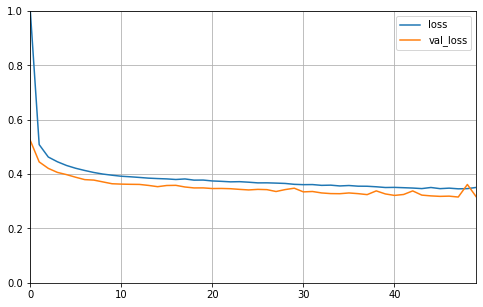

In [50]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [51]:
X_new_scaled = X_test_scaled[:3]

In [52]:
y_test[:3]

array([2.125, 2.413, 1.695])

In [53]:
model.predict(X_new_scaled)

array([[1.2939323],
       [3.271979 ],
       [1.6388032]], dtype=float32)

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
np.sqrt(mean_squared_error(y_test[:3], model.predict(X_new_scaled)))

0.690815134341728

In [56]:
ip_layer = keras.layers.Input(shape = X_train[0].shape)
hidden1 = keras.layers.Dense(30, activation = 'relu')(ip_layer)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.concatenate([ip_layer, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [ip_layer], outputs = [output])

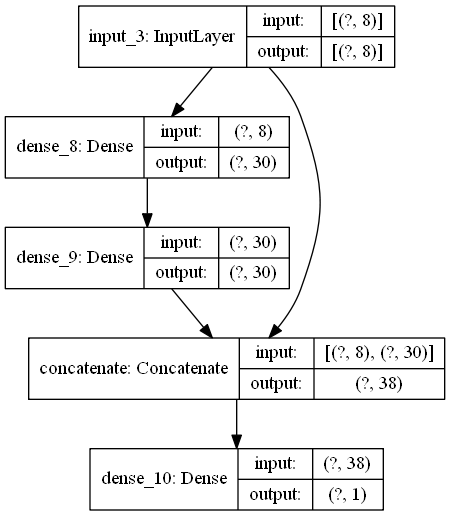

In [57]:
keras.utils.plot_model(model, show_shapes = True)

In [58]:
input_A = keras.layers.Input(shape = [5])
input_B = keras.layers.Input(shape = [6])
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_B)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_A, input_B], outputs = [output])

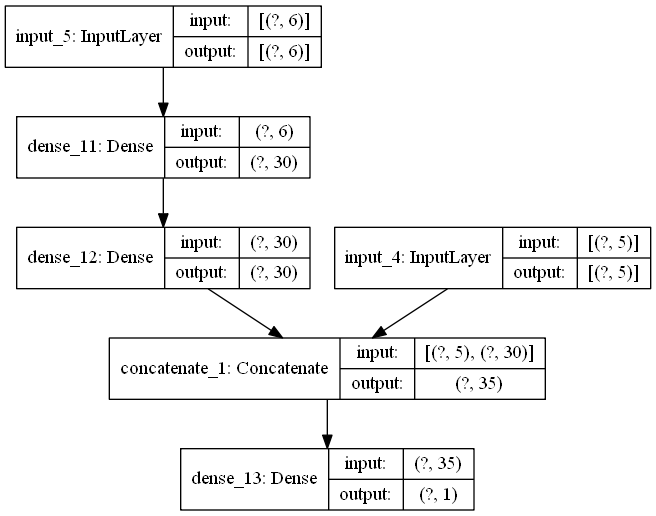

In [59]:
keras.utils.plot_model(model, show_shapes = True)

In [60]:
model.compile(loss = 'mse', optimizer = 'sgd')

X_train_A, X_train_B = X_train_scaled[:, :5], X_train_scaled[:, 2:]
X_valid_A, X_valid_B = X_valid_scaled[:, :5], X_valid_scaled[:, 2:]
X_test_A, X_test_B = X_test_scaled[:, :5], X_test_scaled[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [61]:
history = model.fit((X_train_A, X_train_B), y_train, epochs = 20,
                    validation_data = ((X_valid_A, X_valid_B), y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - ETA: 0s - loss: 0.883 - 1s 71us/sample - loss: 0.9037 - val_loss: 0.4731
Epoch 2/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4822 - val_loss: 0.4294
Epoch 3/20
11610/11610 [==============================] - 1s 43us/sample - loss: 0.4523 - val_loss: 0.4140
Epoch 4/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4373 - val_loss: 0.4039
Epoch 5/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4277 - val_loss: 0.3985
Epoch 6/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4191 - val_loss: 0.3889
Epoch 7/20
11610/11610 [==============================] - 1s 43us/sample - loss: 0.4131 - val_loss: 0.3797
Epoch 8/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4073 - val_loss: 0.3827
Epoch 9/20
11610/11610 [==============================] - 0s 40us/sampl

In [62]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

5160/5160 [==============================] - 0s 20us/sample - loss: 0.3710


In [63]:
y_test[:3]

array([2.125, 2.413, 1.695])

In [64]:
model.predict((X_new_A, X_new_B))

array([[1.5133281],
       [2.854331 ],
       [1.6665186]], dtype=float32)

In [65]:
np.sqrt(mean_squared_error(y_test, model.predict((X_test_A, X_test_B))))

0.609067325784054

In [66]:
input_A = keras.layers.Input(shape = [5])
input_B = keras.layers.Input(shape = [6])
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_B)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs = [input_A, input_B],
                          outputs = [output, aux_output])

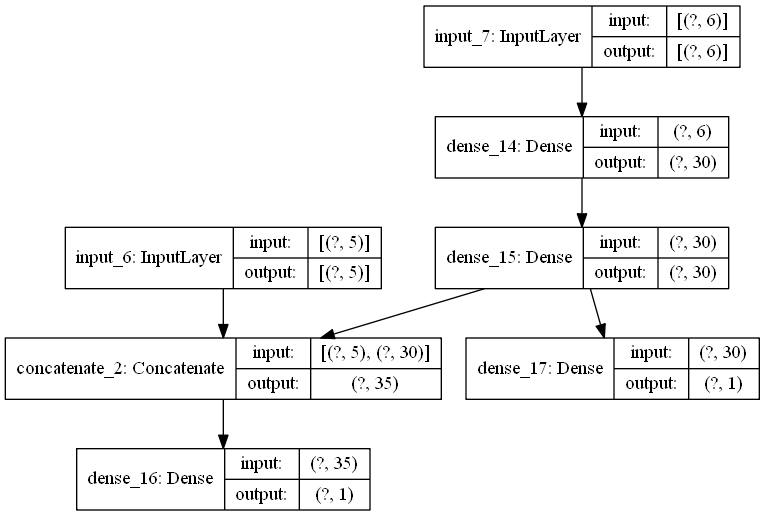

In [67]:
keras.utils.plot_model(model, show_shapes = True, show_layer_names = True)

In [68]:
model.compile(loss = ['mse', 'mse'], loss_weights = [0.9, 0.1], optimizer = 'sgd')

In [69]:
history = model.fit((X_train_A, X_train_B), (y_train, y_train),
                   epochs = 20, validation_data = ((X_valid_A, X_valid_B), (y_valid, y_valid)))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 94us/sample - loss: 0.8900 - dense_16_loss: 0.8530 - dense_17_loss: 1.2212 - val_loss: 0.5400 - val_dense_16_loss: 0.4917 - val_dense_17_loss: 0.9732
Epoch 2/20
11610/11610 [==============================] - 1s 50us/sample - loss: 0.5264 - dense_16_loss: 0.4895 - dense_17_loss: 0.8587 - val_loss: 0.4636 - val_dense_16_loss: 0.4283 - val_dense_17_loss: 0.7813
Epoch 3/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.4759 - dense_16_loss: 0.4476 - dense_17_loss: 0.7298 - val_loss: 0.4427 - val_dense_16_loss: 0.4135 - val_dense_17_loss: 0.7053
Epoch 4/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.4521 - dense_16_loss: 0.4283 - dense_17_loss: 0.6660 - val_loss: 0.4179 - val_dense_16_loss: 0.3932 - val_dense_17_loss: 0.6407
Epoch 5/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4376 - dense_16_loss: 0.

In [70]:
total_loss, main_loss, aux_loss = model.evaluate(
    (X_test_A, X_test_B), (y_test, y_test)
)

5160/5160 [==============================] - 0s 25us/sample - loss: 0.3644 - dense_16_loss: 0.3511 - dense_17_loss: 0.4818


In [71]:
print(total_loss, main_loss, aux_loss)

0.3644358883070391 0.3510553 0.48177436


In [72]:
(main_loss+aux_loss)/2

0.4164148271083832

In [73]:
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

In [74]:
print(y_pred_main)
print('----------------')
print(y_pred_aux)

[[1.3111475]
 [2.8234248]
 [1.6978574]]
----------------
[[1.3735684]
 [2.2082384]
 [1.2719474]]


In [75]:
y_test[:3]

array([2.125, 2.413, 1.695])

In [76]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units = 30, activation = 'relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation = activation)
        self.hidden2 = keras.layers.Dense(units, activation = activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [77]:
model = WideAndDeepModel()

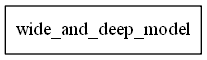

In [78]:
keras.utils.plot_model(model)

In [79]:
input_A = keras.layers.Input(shape = 5)
input_B = keras.layers.Input(shape = 6)

In [86]:
main_output, aux_output = model.call((input_A, input_B))

In [87]:
model = keras.models.Model(inputs = [input_A, input_B],
                           outputs = [main_output, aux_output])

In [88]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 30)           210         input_9[0][0]                    
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 30)           930         dense_18[3][0]                   
____________________________________________________________________________________________

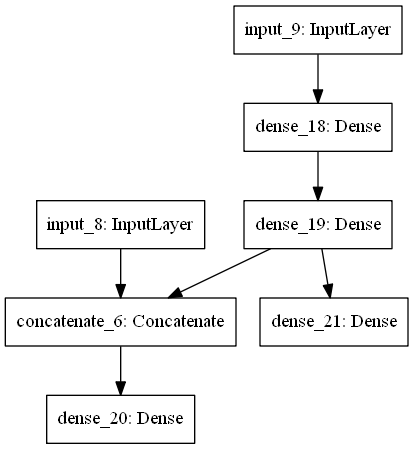

In [89]:
keras.utils.plot_model(model)

In [135]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [136]:
model.layers

In [137]:
weights, bias = model.layers[1].weights

In [138]:
weights

<tf.Variable 'dense_38/kernel:0' shape=(784, 300) dtype=float32, numpy=
array([[-0.01502895,  0.04970423,  0.01472011, ...,  0.03670143,
        -0.05947806,  0.07362337],
       [-0.06180634, -0.03763096,  0.00705674, ...,  0.00013431,
         0.07207802,  0.00379689],
       [-0.06775577, -0.00522408,  0.03715502, ...,  0.02060947,
        -0.04096412, -0.01205418],
       ...,
       [-0.05220672,  0.00221556,  0.00592962, ..., -0.02055415,
        -0.03394637,  0.00506026],
       [ 0.07202005,  0.02739532, -0.01059236, ...,  0.04060426,
         0.02396696, -0.03024357],
       [ 0.06090346, -0.01925478, -0.06102122, ...,  0.03845683,
         0.02742747,  0.00294603]], dtype=float32)>

In [139]:
bias

<tf.Variable 'dense_38/bias:0' shape=(300,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.,

In [140]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_39 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_40 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


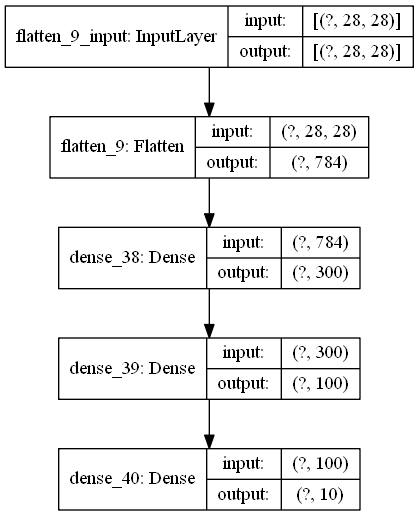

In [141]:
keras.utils.plot_model(model, show_shapes = True, show_layer_names = True)

In [142]:
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [143]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_mode.h5',
                                         save_best_only = True)

In [144]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [145]:
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]

In [146]:
history = model.fit(X_train, y_train, epochs = 30,
                    validation_data = (X_valid, y_valid),
                   callbacks = [checkpoint_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 4s 73us/sample - loss: 644402275675782016.0000 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.0986
Epoch 2/50
55000/55000 [==============================] - 4s 66us/sample - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy: 0.0986
Epoch 3/50
55000/55000 [==============================] - 4s 66us/sample - loss: 2.3026 - accuracy: 0.0994 - val_loss: 2.3028 - val_accuracy: 0.0980
Epoch 4/50
55000/55000 [==============================] - 4s 67us/sample - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3028 - val_accuracy: 0.0986
Epoch 5/50
55000/55000 [==============================] - 4s 79us/sample - loss: 2.3026 - accuracy: 0.0978 - val_loss: 2.3029 - val_accuracy: 0.0986
Epoch 6/50
55000/55000 [==============================] - 4s 77us/sample - loss: 2.3026 - accuracy: 0.0993 - val_loss: 2.3029 - val_accuracy: 0.0914
Epoch 7/50
55000/55000 [================

In [148]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 39us/sample - loss: 2.3037 - accuracy: 0.1000


[2.3037168037414553, 0.1]

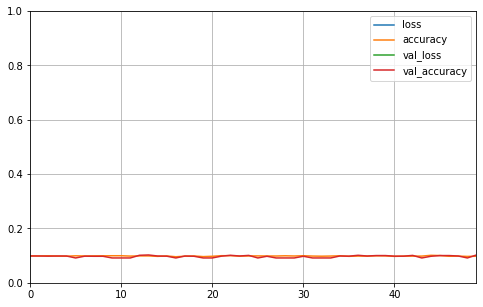

In [153]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim([0, 1])
plt.show()

In [154]:
model = keras.models.load_model('my_keras_model.h5')

In [155]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 49us/sample - loss: 2.3037 - accuracy: 0.1000


[2.303704496383667, 0.1]

In [158]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

In [160]:
history = model.fit(X_train, y_train, epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
45216/55000 [=======================>......] - ETA: 0s - loss: 2.3026 - accuracy: 0.0989WARNING:tensorflow:Can save best model only with val_loss available, skipping.


KeyboardInterrupt: 

In [161]:
class PrintAlTrainRatioCallBack(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train: {:.2f}'.format(logs['val_loss']/logs['loss']))

In [176]:
import os
import time

In [193]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'sgd', metrics = ['accuracy'])

save_model_cb = keras.callbacks.ModelCheckpoint('new_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5,
                                                 restore_best_weights = True)

In [209]:
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

In [210]:
run_logdir = get_run_logdir()

In [211]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs = 10,
                   validation_data = (X_valid, y_valid),
                   callbacks = [save_model_cb, early_stopping_cb,
                               tensorboard_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 94us/sample - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3028 - val_accuracy: 0.0976
Epoch 2/10
55000/55000 [==============================] - 4s 81us/sample - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3029 - val_accuracy: 0.0914
Epoch 3/10
55000/55000 [==============================] - 5s 97us/sample - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3029 - val_accuracy: 0.0914
Epoch 4/10
55000/55000 [==============================] - 5s 92us/sample - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3029 - val_accuracy: 0.0914
Epoch 5/10
55000/55000 [==============================] - 6s 114us/sample - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 6/10
55000/55000 [==============================] - 5s 92us/sample - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.0986
Epoch 7/10
55000/55000 [==============================] 

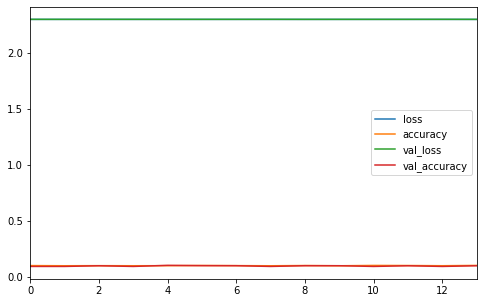

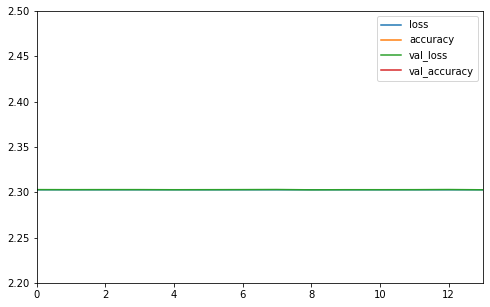

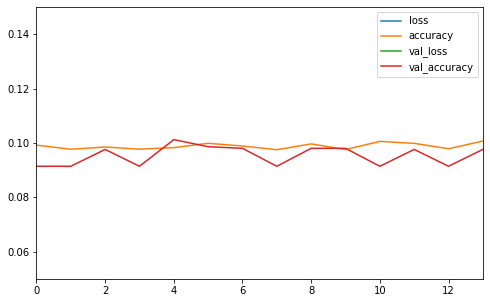

In [208]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.show()

pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.axis([0, 13, 2.2, 2.5])
plt.show()

pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.axis([0, 13, 0.05, 0.15])
plt.show()

In [18]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [20]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = [8]),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(1)
])

In [21]:
model.compile(loss = 'mse', optimizer = keras.optimizers.SGD(lr = 1e-3))
history = model.fit(X_train_scaled, y_train, epochs = 10, validation_data = (X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 73us/sample - loss: 1.7120 - val_loss: 0.8281
Epoch 2/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.7191 - val_loss: 0.7225
Epoch 3/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.6368 - val_loss: 0.6737
Epoch 4/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.5926 - val_loss: 0.6404
Epoch 5/10
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5573 - val_loss: 0.6101
Epoch 6/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.5302 - val_loss: 0.5847
Epoch 7/10
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5095 - val_loss: 0.5692
Epoch 8/10
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4920 - val_loss: 0.5494
Epoch 9/10
11610/11610 [==============================] - ETA: 0s - loss: 0.482 - 0s 40us/sampl

In [22]:
model.save('regressor_model.h5')

In [23]:
model = keras.models.load_model('regressor_model.h5')

In [24]:
model.evaluate(X_test_scaled, y_test)

5160/5160 [==============================] - 0s 29us/sample - loss: 0.5015


0.5014712503252103

In [25]:
from sklearn.metrics import r2_score

In [26]:
y_pred = model.predict(X_test)

In [27]:
r2_score(y_test, y_pred)

-36798.767343241045

In [29]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('regressor_model_checkpoint', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)

In [33]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = [8]),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(1)
])

In [34]:
model.compile(loss = 'mse', optimizer = keras.optimizers.SGD(lr = 0.001))
history = model.fit(X_train_scaled, y_train, epochs = 10,
         validation_data = (X_valid, y_valid),
         callbacks = [checkpoint_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 62us/sample - loss: 1.7718 - val_loss: 463406.3972
Epoch 2/10
11610/11610 [==============================] - 0s 38us/sample - loss: 0.7611 - val_loss: 202962.6429
Epoch 3/10
11610/11610 [==============================] - 0s 38us/sample - loss: 0.6597 - val_loss: 126712.3806
Epoch 4/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.6157 - val_loss: 114202.9686
Epoch 5/10
11610/11610 [==============================] - 0s 38us/sample - loss: 0.5846 - val_loss: 90016.1710
Epoch 6/10
11610/11610 [==============================] - 0s 38us/sample - loss: 0.5603 - val_loss: 73515.7437
Epoch 7/10
11610/11610 [==============================] - 0s 38us/sample - loss: 0.5407 - val_loss: 61836.8443
Epoch 8/10
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5244 - val_loss: 55094.7019
Epoch 9/10
11610/11610 [==============================] - 0

In [35]:
import pandas as pd

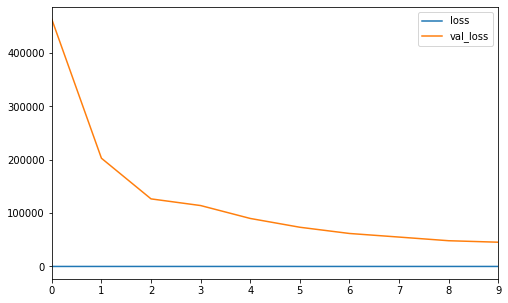

In [41]:
pd.DataFrame(history.history).plot(figsize = (8, 5))

In [61]:
import os
import time

In [62]:
my_log_dir = os.path.join(os.curdir, 'my_log_files')

In [63]:
def new_log():
    tmp_path = time.strftime('log-%Y_%m_%d-%H_%M_%S')
    return os.path.join(my_log_dir, tmp_path)

In [64]:
cur_log = new_log()
cur_log

'.\\my_log_files\\log-2020_04_14-08_42_45'

In [65]:
keras.backend.clear_session()

tensorboard_cb = keras.callbacks.TensorBoard(cur_log)

In [66]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = [8]),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(1)
])

model.compile(loss = 'mse', optimizer = keras.optimizers.SGD(lr = 0.0001))
history = model.fit(X_train_scaled, y_train, epochs = 10,
                   callbacks = [tensorboard_cb],
                   validation_data = [X_valid_scaled, y_valid])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 92us/sample - loss: 5.6203 - val_loss: 4.9031
Epoch 2/10
11610/11610 [==============================] - 1s 53us/sample - loss: 4.1900 - val_loss: 3.7604
Epoch 3/10
11610/11610 [==============================] - 1s 55us/sample - loss: 3.2479 - val_loss: 2.9483
Epoch 4/10
11610/11610 [==============================] - 1s 54us/sample - loss: 2.5792 - val_loss: 2.3604
Epoch 5/10
11610/11610 [==============================] - 1s 53us/sample - loss: 2.1040 - val_loss: 1.9417
Epoch 6/10
11610/11610 [==============================] - 1s 55us/sample - loss: 1.7659 - val_loss: 1.6446
Epoch 7/10
11610/11610 [==============================] - 1s 59us/sample - loss: 1.5214 - val_loss: 1.4300
Epoch 8/10
11610/11610 [==============================] - 1s 54us/sample - loss: 1.3392 - val_loss: 1.2732
Epoch 9/10
11610/11610 [==============================] - 1s 54us/sample - loss: 1.1990 - val_l

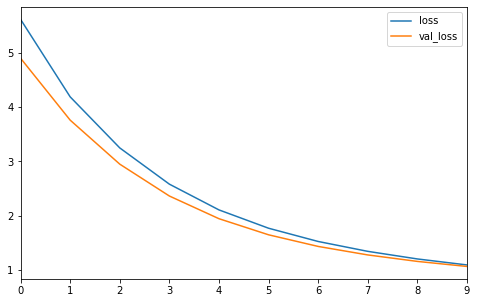

In [67]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.show()

In [75]:
def build_model(n_hidden = 1, n_neurons = 30, learning_rate = 0.003, input_shape = [8]):
    model = keras.models.Sequential()
    options = {'input_shape': input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation = 'relu', **options))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss = 'mse', optimizer = optimizer)
    return model

In [76]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [77]:
keras_reg.fit(X_train_scaled, y_train, epochs = 100,
             callbacks = [keras.callbacks.EarlyStopping(patience = 10)],
             validation_data = [X_valid_scaled, y_valid])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - ETA: 0s - loss: 1.127 - 1s 58us/sample - loss: 1.0853 - val_loss: 0.7204
Epoch 2/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.6192 - val_loss: 0.6368
Epoch 3/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5532 - val_loss: 0.5957
Epoch 4/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5201 - val_loss: 0.5696
Epoch 5/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4961 - val_loss: 0.5478
Epoch 6/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4833 - val_loss: 0.5387
Epoch 7/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4701 - val_loss: 0.5280
Epoch 8/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4639 - val_loss: 0.5238
Epoch 9/100
11610/11610 [==============================] - 0s 4

11610/11610 [==============================] - 0s 37us/sample - loss: 0.3466 - val_loss: 0.4032
Epoch 76/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.3453 - val_loss: 0.4061
Epoch 77/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3452 - val_loss: 0.3974
Epoch 78/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.3454 - val_loss: 0.3959
Epoch 79/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3435 - val_loss: 0.3964
Epoch 80/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.3458 - val_loss: 0.3948
Epoch 81/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3407 - val_loss: 0.4055
Epoch 82/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3450 - val_loss: 0.3955
Epoch 83/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3410 - val_loss: 0.4042
Epoch 84/100
11610/11610 [======

In [88]:
keras_reg.score(X_test_scaled, y_test)

5160/5160 [==============================] - 0s 22us/sample - loss: 0.3686


-0.3685740273128184

In [89]:
y_pred = keras_reg.predict(X_test_scaled)

In [90]:
from sklearn.metrics import r2_score

In [91]:
r2_score(y_test, y_pred)

0.7186223775408023

In [95]:
import numpy as np
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [96]:
param_distribs = {
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': np.arange(1, 100),
    'learning_rate': reciprocal(0.0001, 0.01)
}

In [99]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter = 10, cv = 3)
rnd_search_cv.fit(X_train_scaled, y_train, epochs = 100,
                 validation_data = (X_valid_scaled, y_valid),
                 callbacks = [keras.callbacks.EarlyStopping(patience = 10)])

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 108us/sample - loss: 3.3602 - val_loss: 1.8361
Epoch 2/100
7740/7740 [==============================] - 0s 42us/sample - loss: 1.4999 - val_loss: 1.1676
Epoch 3/100
7740/7740 [==============================] - 0s 40us/sample - loss: 1.0301 - val_loss: 0.9450
Epoch 4/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.8635 - val_loss: 0.8565
Epoch 5/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.7894 - val_loss: 0.8104
Epoch 6/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.7470 - val_loss: 0.7770
Epoch 7/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.7163 - val_loss: 0.7507
Epoch 8/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6916 - val_loss: 0.7286
Epoch 9/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6706 - val_loss: 0.70

7740/7740 [==============================] - 0s 41us/sample - loss: 0.4297 - val_loss: 0.4844
Epoch 77/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4292 - val_loss: 0.4841
Epoch 78/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4288 - val_loss: 0.4835
Epoch 79/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4282 - val_loss: 0.4831
Epoch 80/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4277 - val_loss: 0.4823
Epoch 81/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4272 - val_loss: 0.4827
Epoch 82/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4268 - val_loss: 0.4819
Epoch 83/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4263 - val_loss: 0.4816
Epoch 84/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4259 - val_loss: 0.4807
Epoch 85/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 42us/sample - loss: 0.4596 - val_loss: 0.5119
Epoch 52/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4583 - val_loss: 0.5103
Epoch 53/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4569 - val_loss: 0.5100
Epoch 54/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4558 - val_loss: 0.5091
Epoch 55/100
7740/7740 [==============================] - ETA: 0s - loss: 0.454 - 0s 41us/sample - loss: 0.4546 - val_loss: 0.5073
Epoch 56/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4534 - val_loss: 0.5053
Epoch 57/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4522 - val_loss: 0.5049
Epoch 58/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4511 - val_loss: 0.5033
Epoch 59/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4500 - val_loss: 0.5027
Epoch 60/100
7740/7740 [==

Epoch 26/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5129 - val_loss: 0.5719
Epoch 27/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5098 - val_loss: 0.5680
Epoch 28/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5069 - val_loss: 0.5651
Epoch 29/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5040 - val_loss: 0.5621
Epoch 30/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5014 - val_loss: 0.5598
Epoch 31/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4987 - val_loss: 0.5568
Epoch 32/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4963 - val_loss: 0.5546
Epoch 33/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4938 - val_loss: 0.5519
Epoch 34/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4914 - val_loss: 0.5497
Epoch 35/100
7740/7740 [=============

7740/7740 [==============================] - 1s 85us/sample - loss: 1.4129 - val_loss: 0.7692
Epoch 2/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.6913 - val_loss: 0.6850
Epoch 3/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.6146 - val_loss: 0.6390
Epoch 4/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5689 - val_loss: 0.5966
Epoch 5/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5353 - val_loss: 0.5688
Epoch 6/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5103 - val_loss: 0.5484
Epoch 7/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4915 - val_loss: 0.5323
Epoch 8/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4758 - val_loss: 0.5191
Epoch 9/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4627 - val_loss: 0.5083
Epoch 10/100
7740/7740 [==============================] - 

7740/7740 [==============================] - 0s 44us/sample - loss: 0.3012 - val_loss: 0.3497
Epoch 78/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3005 - val_loss: 0.3473
Epoch 79/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.2995 - val_loss: 0.3514
Epoch 80/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.2979 - val_loss: 0.3505
Epoch 81/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.2980 - val_loss: 0.3466
Epoch 82/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.2972 - val_loss: 0.3526
Epoch 83/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.2962 - val_loss: 0.3429
Epoch 84/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.2956 - val_loss: 0.3430
Epoch 85/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.2943 - val_loss: 0.3424
Epoch 86/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 44us/sample - loss: 0.3266 - val_loss: 0.3828
Epoch 53/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3241 - val_loss: 0.3836
Epoch 54/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3228 - val_loss: 0.3813
Epoch 55/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3215 - val_loss: 0.3803
Epoch 56/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3204 - val_loss: 0.3782
Epoch 57/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3187 - val_loss: 0.3820
Epoch 58/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3174 - val_loss: 0.3741
Epoch 59/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3156 - val_loss: 0.3769
Epoch 60/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3150 - val_loss: 0.3725
Epoch 61/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 51us/sample - loss: 0.3662 - val_loss: 0.4170
Epoch 28/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3642 - val_loss: 0.4149
Epoch 29/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3616 - val_loss: 0.4154
Epoch 30/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3593 - val_loss: 0.4084
Epoch 31/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3573 - val_loss: 0.4140
Epoch 32/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.3548 - val_loss: 0.4037
Epoch 33/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3526 - val_loss: 0.4026
Epoch 34/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3509 - val_loss: 0.4004
Epoch 35/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.3489 - val_loss: 0.4024
Epoch 36/100
7740/7740 [==========================

7740/7740 [==============================] - 1s 79us/sample - loss: 1.5131 - val_loss: 0.7283
Epoch 2/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6492 - val_loss: 0.6582
Epoch 3/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5963 - val_loss: 0.6168
Epoch 4/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5525 - val_loss: 0.5875
Epoch 5/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5240 - val_loss: 0.5615
Epoch 6/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5040 - val_loss: 0.5428
Epoch 7/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4838 - val_loss: 0.5373
Epoch 8/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4707 - val_loss: 0.5183
Epoch 9/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4636 - val_loss: 0.5101
Epoch 10/100
7740/7740 [==============================] - 

7740/7740 [==============================] - 0s 41us/sample - loss: 0.3626 - val_loss: 0.4139
Epoch 78/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3584 - val_loss: 0.4132
Epoch 79/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3642 - val_loss: 0.4109
Epoch 80/100
7740/7740 [==============================] - ETA: 0s - loss: 0.357 - 0s 40us/sample - loss: 0.3573 - val_loss: 0.4102
Epoch 81/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3582 - val_loss: 0.4112
Epoch 82/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3593 - val_loss: 0.4102
Epoch 83/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3560 - val_loss: 0.4097
Epoch 84/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3549 - val_loss: 0.4087
Epoch 85/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3603 - val_loss: 0.4112
Epoch 86/100
7740/7740 [==

7740/7740 [==============================] - 0s 43us/sample - loss: 0.3771 - val_loss: 0.4348
Epoch 53/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3757 - val_loss: 0.4340
Epoch 54/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3753 - val_loss: 0.4328
Epoch 55/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3748 - val_loss: 0.4311
Epoch 56/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3737 - val_loss: 0.4309
Epoch 57/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3726 - val_loss: 0.4301
Epoch 58/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3723 - val_loss: 0.4279
Epoch 59/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3716 - val_loss: 0.4276
Epoch 60/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3706 - val_loss: 0.4280
Epoch 61/100
7740/7740 [==========================

Epoch 27/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4223 - val_loss: 0.4772
Epoch 28/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4208 - val_loss: 0.4754
Epoch 29/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4190 - val_loss: 0.4731
Epoch 30/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4172 - val_loss: 0.4732
Epoch 31/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4156 - val_loss: 0.4711
Epoch 32/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4144 - val_loss: 0.4695
Epoch 33/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4130 - val_loss: 0.4690
Epoch 34/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4115 - val_loss: 0.4673
Epoch 35/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4098 - val_loss: 0.4639
Epoch 36/100
7740/7740 [=============

7740/7740 [==============================] - 0s 43us/sample - loss: 0.5731 - val_loss: 0.5771
Epoch 3/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4992 - val_loss: 0.5298
Epoch 4/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4624 - val_loss: 0.5029
Epoch 5/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4397 - val_loss: 0.4859
Epoch 6/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4266 - val_loss: 0.4822
Epoch 7/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4174 - val_loss: 0.4713
Epoch 8/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4117 - val_loss: 0.4720
Epoch 9/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4047 - val_loss: 0.4625
Epoch 10/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4000 - val_loss: 0.4565
Epoch 11/100
7740/7740 [==============================] -

Epoch 79/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.2993 - val_loss: 0.3538
Epoch 80/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.2995 - val_loss: 0.3558
Epoch 81/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.2962 - val_loss: 0.3531
Epoch 82/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.2954 - val_loss: 0.3544
Epoch 83/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.2947 - val_loss: 0.3551
Epoch 84/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.2954 - val_loss: 0.3538
Epoch 85/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.2949 - val_loss: 0.3533
Epoch 86/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.2946 - val_loss: 0.3616
Epoch 87/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.2955 - val_loss: 0.3528
Epoch 88/100
7740/7740 [=============

7740/7740 [==============================] - 0s 54us/sample - loss: 0.3257 - val_loss: 0.3738
Epoch 55/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.3238 - val_loss: 0.3716
Epoch 56/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.3226 - val_loss: 0.3718
Epoch 57/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3215 - val_loss: 0.3663
Epoch 58/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.3205 - val_loss: 0.3673
Epoch 59/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3191 - val_loss: 0.3747
Epoch 60/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3178 - val_loss: 0.3675
Epoch 61/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3179 - val_loss: 0.3691
Epoch 62/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3185 - val_loss: 0.3616
Epoch 63/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 52us/sample - loss: 0.3599 - val_loss: 0.4173
Epoch 30/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3578 - val_loss: 0.4128
Epoch 31/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3560 - val_loss: 0.4087
Epoch 32/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3553 - val_loss: 0.4081
Epoch 33/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3532 - val_loss: 0.4091
Epoch 34/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3527 - val_loss: 0.4051
Epoch 35/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3514 - val_loss: 0.4025
Epoch 36/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3498 - val_loss: 0.4057
Epoch 37/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3497 - val_loss: 0.3998
Epoch 38/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 36us/sample - loss: 3.4430 - val_loss: 2.9438
Epoch 5/100
7740/7740 [==============================] - 0s 35us/sample - loss: 2.7216 - val_loss: 2.3805
Epoch 6/100
7740/7740 [==============================] - 0s 35us/sample - loss: 2.2014 - val_loss: 1.9675
Epoch 7/100
7740/7740 [==============================] - 0s 35us/sample - loss: 1.8228 - val_loss: 1.6635
Epoch 8/100
7740/7740 [==============================] - 0s 35us/sample - loss: 1.5455 - val_loss: 1.4387
Epoch 9/100
7740/7740 [==============================] - 0s 35us/sample - loss: 1.3408 - val_loss: 1.2716
Epoch 10/100
7740/7740 [==============================] - 0s 36us/sample - loss: 1.1887 - val_loss: 1.1470
Epoch 11/100
7740/7740 [==============================] - 0s 35us/sample - loss: 1.0750 - val_loss: 1.0535
Epoch 12/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.9896 - val_loss: 0.9832
Epoch 13/100
7740/7740 [==============================]

7740/7740 [==============================] - 0s 36us/sample - loss: 0.5622 - val_loss: 0.6151
Epoch 81/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5610 - val_loss: 0.6139
Epoch 82/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5598 - val_loss: 0.6128
Epoch 83/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5587 - val_loss: 0.6117
Epoch 84/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5576 - val_loss: 0.6106
Epoch 85/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5565 - val_loss: 0.6095
Epoch 86/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5554 - val_loss: 0.6085
Epoch 87/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5544 - val_loss: 0.6074
Epoch 88/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5534 - val_loss: 0.6065
Epoch 89/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 36us/sample - loss: 0.6252 - val_loss: 0.6781
Epoch 56/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.6227 - val_loss: 0.6757
Epoch 57/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.6203 - val_loss: 0.6734
Epoch 58/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.6179 - val_loss: 0.6711
Epoch 59/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.6156 - val_loss: 0.6689
Epoch 60/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.6133 - val_loss: 0.6667
Epoch 61/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.6111 - val_loss: 0.6645
Epoch 62/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.6089 - val_loss: 0.6625
Epoch 63/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.6068 - val_loss: 0.6604
Epoch 64/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 36us/sample - loss: 0.5798 - val_loss: 0.6345
Epoch 31/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5779 - val_loss: 0.6329
Epoch 32/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5760 - val_loss: 0.6312
Epoch 33/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5743 - val_loss: 0.6297
Epoch 34/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5727 - val_loss: 0.6283
Epoch 35/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5712 - val_loss: 0.6270
Epoch 36/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5697 - val_loss: 0.6256
Epoch 37/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5682 - val_loss: 0.6242
Epoch 38/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5668 - val_loss: 0.6229
Epoch 39/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 52us/sample - loss: 1.3683 - val_loss: 1.1742
Epoch 6/100
7740/7740 [==============================] - 0s 55us/sample - loss: 1.1526 - val_loss: 1.0272
Epoch 7/100
7740/7740 [==============================] - 0s 52us/sample - loss: 1.0009 - val_loss: 0.9311
Epoch 8/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.8947 - val_loss: 0.8651
Epoch 9/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.8212 - val_loss: 0.8196
Epoch 10/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.7721 - val_loss: 0.7900
Epoch 11/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.7386 - val_loss: 0.7696
Epoch 12/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.7154 - val_loss: 0.7550
Epoch 13/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.6993 - val_loss: 0.7444
Epoch 14/100
7740/7740 [==============================

7740/7740 [==============================] - 0s 52us/sample - loss: 0.5236 - val_loss: 0.5843
Epoch 82/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5225 - val_loss: 0.5832
Epoch 83/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5213 - val_loss: 0.5820
Epoch 84/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.5201 - val_loss: 0.5811
Epoch 85/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5190 - val_loss: 0.5798
Epoch 86/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.5178 - val_loss: 0.5786
Epoch 87/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.5167 - val_loss: 0.5776
Epoch 88/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5156 - val_loss: 0.5763
Epoch 89/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5145 - val_loss: 0.5754
Epoch 90/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 53us/sample - loss: 0.5276 - val_loss: 0.5835
Epoch 57/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.5259 - val_loss: 0.5818
Epoch 58/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5241 - val_loss: 0.5802
Epoch 59/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5224 - val_loss: 0.5786
Epoch 60/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5208 - val_loss: 0.5770
Epoch 61/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5192 - val_loss: 0.5756
Epoch 62/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5176 - val_loss: 0.5741
Epoch 63/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5161 - val_loss: 0.5726
Epoch 64/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5146 - val_loss: 0.5712
Epoch 65/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 52us/sample - loss: 0.5935 - val_loss: 0.6509
Epoch 32/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5896 - val_loss: 0.6470
Epoch 33/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5859 - val_loss: 0.6433
Epoch 34/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5822 - val_loss: 0.6397
Epoch 35/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5786 - val_loss: 0.6362
Epoch 36/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5752 - val_loss: 0.6328
Epoch 37/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5718 - val_loss: 0.6294
Epoch 38/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5686 - val_loss: 0.6261
Epoch 39/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.5654 - val_loss: 0.6230
Epoch 40/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 36us/sample - loss: 0.7798 - val_loss: 0.7694
Epoch 7/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.6976 - val_loss: 0.7119
Epoch 8/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.6507 - val_loss: 0.6789
Epoch 9/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.6231 - val_loss: 0.6595
Epoch 10/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.6062 - val_loss: 0.6478
Epoch 11/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5949 - val_loss: 0.6397
Epoch 12/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5872 - val_loss: 0.6339
Epoch 13/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5813 - val_loss: 0.6295
Epoch 14/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5765 - val_loss: 0.6259
Epoch 15/100
7740/7740 [=============================

7740/7740 [==============================] - 0s 36us/sample - loss: 0.5097 - val_loss: 0.5639
Epoch 83/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5096 - val_loss: 0.5640
Epoch 84/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5095 - val_loss: 0.5637
Epoch 85/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5094 - val_loss: 0.5636
Epoch 86/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5093 - val_loss: 0.5637
Epoch 87/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5092 - val_loss: 0.5636
Epoch 88/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5090 - val_loss: 0.5634
Epoch 89/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5090 - val_loss: 0.5633
Epoch 90/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5089 - val_loss: 0.5633
Epoch 91/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 35us/sample - loss: 0.5224 - val_loss: 0.5792
Epoch 58/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5215 - val_loss: 0.5784
Epoch 59/100
7740/7740 [==============================] - 0s 32us/sample - loss: 0.5207 - val_loss: 0.5776
Epoch 60/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5199 - val_loss: 0.5769
Epoch 61/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5192 - val_loss: 0.5763
Epoch 62/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5185 - val_loss: 0.5755
Epoch 63/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5178 - val_loss: 0.5750
Epoch 64/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5171 - val_loss: 0.5744
Epoch 65/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5165 - val_loss: 0.5739
Epoch 66/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 36us/sample - loss: 0.5616 - val_loss: 0.6199
Epoch 33/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5593 - val_loss: 0.6175
Epoch 34/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5576 - val_loss: 0.6157
Epoch 35/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5557 - val_loss: 0.6144
Epoch 36/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5538 - val_loss: 0.6127
Epoch 37/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5521 - val_loss: 0.6112
Epoch 38/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5503 - val_loss: 0.6090
Epoch 39/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5489 - val_loss: 0.6078
Epoch 40/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5473 - val_loss: 0.6067
Epoch 41/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 46us/sample - loss: 1.2177 - val_loss: 1.1498
Epoch 8/100
7740/7740 [==============================] - 0s 42us/sample - loss: 1.0901 - val_loss: 1.0599
Epoch 9/100
7740/7740 [==============================] - 0s 43us/sample - loss: 1.0153 - val_loss: 1.0074
Epoch 10/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.9659 - val_loss: 0.9722
Epoch 11/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.9293 - val_loss: 0.9457
Epoch 12/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.8999 - val_loss: 0.9235
Epoch 13/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.8749 - val_loss: 0.9042
Epoch 14/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.8533 - val_loss: 0.8870
Epoch 15/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.8346 - val_loss: 0.8718
Epoch 16/100
7740/7740 [============================

7740/7740 [==============================] - 0s 43us/sample - loss: 0.5831 - val_loss: 0.6371
Epoch 84/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5816 - val_loss: 0.6356
Epoch 85/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5800 - val_loss: 0.6342
Epoch 86/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5784 - val_loss: 0.6327
Epoch 87/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5769 - val_loss: 0.6310
Epoch 88/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5753 - val_loss: 0.6295
Epoch 89/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5738 - val_loss: 0.6281
Epoch 90/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5722 - val_loss: 0.6264
Epoch 91/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5707 - val_loss: 0.6250
Epoch 92/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 43us/sample - loss: 0.6034 - val_loss: 0.6668
Epoch 59/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6017 - val_loss: 0.6652
Epoch 60/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6001 - val_loss: 0.6633
Epoch 61/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5985 - val_loss: 0.6618
Epoch 62/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5969 - val_loss: 0.6603
Epoch 63/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5953 - val_loss: 0.6587
Epoch 64/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5938 - val_loss: 0.6571
Epoch 65/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5923 - val_loss: 0.6557
Epoch 66/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5907 - val_loss: 0.6540
Epoch 67/100
7740/7740 [==========================

Epoch 33/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6274 - val_loss: 0.6868
Epoch 34/100
7740/7740 [==============================] - ETA: 0s - loss: 0.619 - 0s 44us/sample - loss: 0.6223 - val_loss: 0.6819
Epoch 35/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.6174 - val_loss: 0.6771
Epoch 36/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.6127 - val_loss: 0.6726
Epoch 37/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.6084 - val_loss: 0.6682
Epoch 38/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6042 - val_loss: 0.6639
Epoch 39/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6002 - val_loss: 0.6598
Epoch 40/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5963 - val_loss: 0.6561
Epoch 41/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5927 - val_loss: 0.6523
Epoch 42/100


KeyboardInterrupt: 

In [100]:
rnd_search_cv.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [101]:
rand_search_cv.best_score_

NameError: name 'rand_search_cv' is not defined

In [102]:
model = rnd_search_cv.best_estimator_.model

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [103]:
# hyperopt, hyperas, kopt, talos, scikit-optimize, spearmint,
# sklearn-deap